In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [2]:
# Define directories
train_dir = r"D:\Desktop\Project Ape\data\train"
test_dir = r"D:\Desktop\Project Ape\data\test"

In [3]:

# Image Data Generators
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create Image Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust as needed
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 881 images belonging to 10 classes.
Found 217 images belonging to 10 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Assuming you have 10 categories
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [19]:
# Define the checkpoint callback to save the best model
checkpoint = ModelCheckpoint('model_best.keras', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)

# Training parameters
epochs = 100

# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint]  # Include the checkpoint callback here
)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1276 - loss: 3.7518
Epoch 1: val_loss improved from inf to 2.22424, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.1272 - loss: 3.7196 - val_accuracy: 0.1667 - val_loss: 2.2242
Epoch 2/100
 1/27 ━━━━━━━━━━━━━━━━━━━━ 21s 832ms/step - accuracy: 0.2188 - loss: 2.2388
Epoch 2: val_loss improved from 2.22424 to 2.21081, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - accuracy: 0.2188 - loss: 2.2388 - val_accuracy: 0.1927 - val_loss: 2.2108
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2133 - loss: 2.1504
Epoch 3: val_loss improved from 2.21081 to 1.95501, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2135 - loss: 2.1484 - val_accuracy: 0.3229 - val_loss: 1.9550
Epoch 4/100
 1/27 ━━━━━━━━━━━━━━━━━━━━ 21s 825ms/step - accuracy: 0.2812 - loss: 1.8800
Epoch 4: val_loss improved from 1.95501 to 1.94366, saving

In [ ]:
# Define the checkpoint callback to save the best model
checkpoint = ModelCheckpoint('model_best.keras', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             mode='min', 
                             verbose=1)

# Training parameters
epochs = 2

# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint]  # Include the checkpoint callback here
)


In [43]:
# Evaluation on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 272 images belonging to 10 classes.


In [45]:
# Get the test data evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 795ms/step - accuracy: 0.7520 - loss: 1.8151
Test loss: 3.687319040298462
Test accuracy: 0.64453125


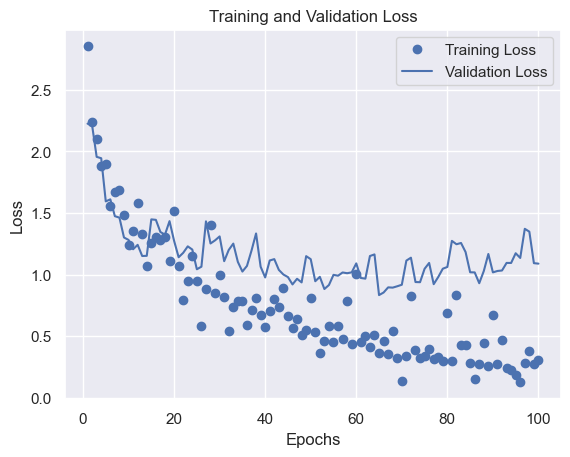

In [47]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


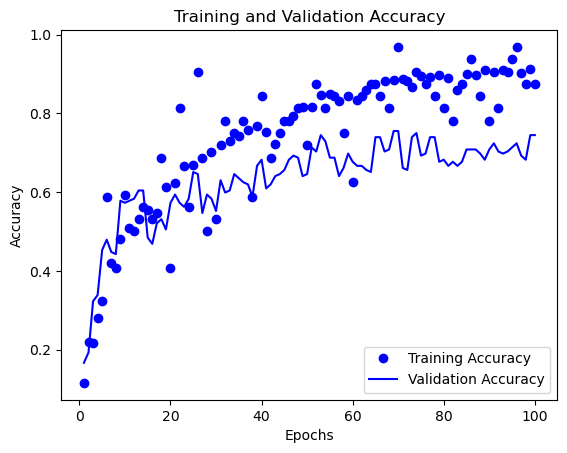

In [25]:
# Plotting Training and Validation Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
validation_pred_probs = model.predict(validation_generator, steps=None)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 773ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 842ms/step
Validation labels length: 217
Predicted labels length: 217


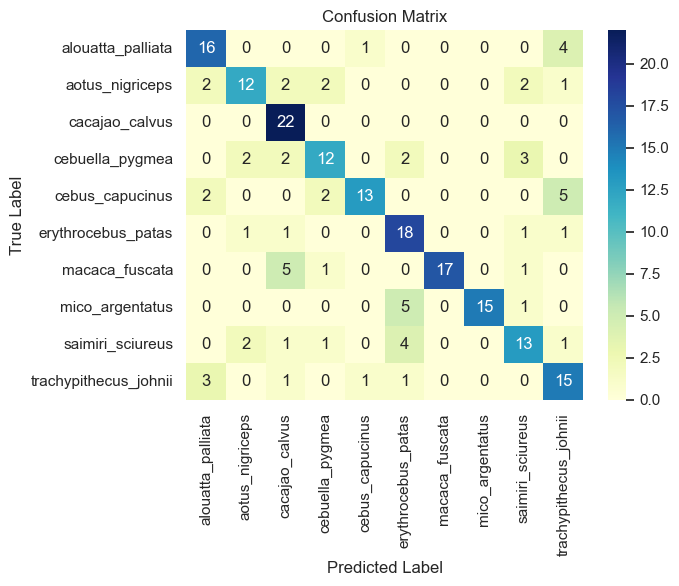

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator, steps=None)  # Let Keras handle steps automatically
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Ensure both arrays have the same length
print("Validation labels length:", len(validation_labels))
print("Predicted labels length:", len(validation_pred_labels))

# If there is still a mismatch, adjust the data or trim one of the arrays (if necessary)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)

# Class names
class_names = list(train_generator.class_indices.keys())

# Plot confusion matrix
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: cacajao_calvus


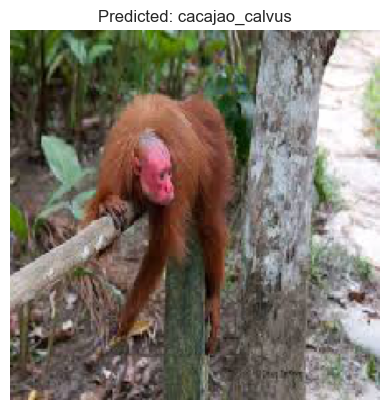

In [35]:
# Image Path
img_path =r"D:\Desktop\DS\Data\Unknown images\download (2).jpeg"

# Load the image with the same target size as model input
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add batch dimension (for model input)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Mapping class index to class name
class_names = list(train_generator.class_indices.keys())
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"Predicted class: {predicted_label}")

# Display the image with the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted class: saimiri_sciureus


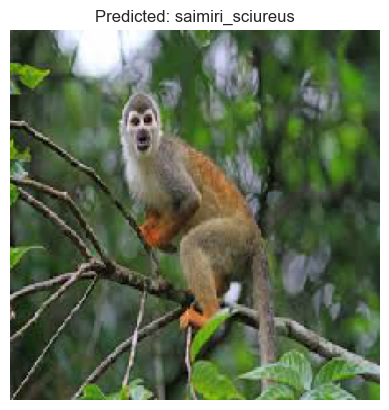

In [51]:
# Image Path
img_path =r"D:\Desktop\DS\Data\Unknown images\images.jpeg"

# Load the image with the same target size as model input
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add batch dimension (for model input)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Mapping class index to class name
class_names = list(train_generator.class_indices.keys())
predicted_label = class_names[predicted_class[0]]

# Print the predicted label
print(f"Predicted class: {predicted_label}")

# Display the image with the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
